# This is an IPython notebook backed by a Ruby kernel

I am developing [IRuby](https://github.com/SciRuby/iruby) a kernel in Ruby that adheres to the [IPython](http://ipython.org/) messaging protocol. It integrates nicely with different Ruby gems as will be shown later.

## What does this give you?

This gives us a very fancy web notebook interface for Ruby.  It's a very good tool for programming presentations. It's basically an in-browser REPL loop, with some extra goodies.

## Usage

Install IRuby with:

~~~
gem install iruby
~~~

Start the IRuby notebook with:

~~~
iruby notebook
~~~

## Example

`$stdout` and `$stderr` are redirected to the notebook

In [1]:
puts 'Hello, world!'

Hello, world!


In [2]:
$stderr.puts 'Error!'

Error!


The last computed result is returned.

In [3]:
Math.sqrt(2)

1.4142135623730951

This works even for images.

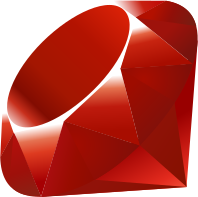

In [4]:
File.open('logo/ruby.svg')

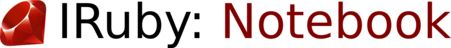

In [5]:
File.open('logo/iruby.png')

## Display

IRuby provides a method to display objects `IRuby.display` and methods to create $\LaTeX$ and HTML representations.

In [6]:
IRuby.display '<b style="color:green">Hello, world!</b>', mime: 'text/html'

"<b style=\"color:green\">Hello, world!</b>"

In [7]:
IRuby.html '<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>'

"<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>"

$\LaTeX$ is rendered using MathJax.

In [8]:
IRuby.display IRuby.latex <<-'TEX'
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}
TEX

IRuby.math('F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

"\\begin{eqnarray}\n\\nabla \\times \\vec{\\mathbf{B}} -\\, \\frac1c\\, \\frac{\\partial\\vec{\\mathbf{E}}}{\\partial t} & = \\frac{4\\pi}{c}\\vec{\\mathbf{j}} \\\\\n\\nabla \\cdot \\vec{\\mathbf{E}} & = 4 \\pi \\rho \\\\\n\\nabla \\times \\vec{\\mathbf{E}}\\, +\\, \\frac1c\\, \\frac{\\partial\\vec{\\mathbf{B}}}{\\partial t} & = \\vec{\\mathbf{0}} \\\\\n\\nabla \\cdot \\vec{\\mathbf{B}} & = 0 \n\\end{eqnarray}\n"

"$$F(k) = \\int_{-\\infty}^{\\infty} f(x) e^{2\\pi i k} dx$$"

Arrays and Hashes can be printed as HTML tables.

In [9]:
IRuby.display IRuby.table([1,2,[],3])
IRuby.display IRuby.table({a:1,b:2,c:3})
IRuby.display IRuby.table([[11,12,13,14],[21,22,23],'not an Array',[31,32,33,34]])
IRuby.display IRuby.table({a:[11,12,13,14],b:[21,22,23],c:[31,32,33,34]})
IRuby.display IRuby.table([{a:1,b:2,c:3},'not an Array',{a:2,b:3,c:4,e:5}])
IRuby.display IRuby.table([{a:1,b:2,c:3},{a:2,b:3,c:4,d:5},{0=>:x,1=>:y},[:a,:b,:c]])

1
2
""
3


a,b,c
1,2,3


"<table><tr><td>11</td><td>12</td><td>13</td><td>14</td></tr><tr><td>21</td><td>22</td><td>23</td><td></td></tr><tr><td colspan='4'>not an Array</td></tr><tr><td>31</td><td>32</td><td>33</td><td>34</td></tr></table>"

a,b,c
11,21,31
12,22,32
13,23,33
14,,34


"<table><tr><th>a</th><th>b</th><th>c</th><th>e</th></tr><tr><td>1</td><td>2</td><td>3</td><td></td></tr><tr><td colspan='4'>not an Array</td></tr><tr><td>2</td><td>3</td><td>4</td><td>5</td></tr></table>"

a,b,c,d,0,1,2
1,2,3,,,,
2,3,4,5,,,
,,,,x,y,
,,,,a,b,c


## Integration with Ruby gems

### Pry

[Pry](https://github.com/pry/pry) is an enhanced Ruby REPL. It will be automatically used by IRuby if available. You can use the code browsing utilities for example.

In [10]:
ls Array

Array.methods: []  try_convert
Array#methods: 
  &            count       include?            reject!               slice!    
  *            cycle       index               repeated_combination  sort      
  +            delete      insert              repeated_permutation  sort!     
  -            delete_at   inspect             replace               sort_by!  
  <<           delete_if   join                reverse               take      
  <=>          drop        keep_if             reverse!              take_while
  ==           drop_while  last                reverse_each          to_a      
  []           each        length              rindex                to_ary    
  []=          each_index  map                 rotate                to_h      
  assoc        empty?      map!                rotate!               to_s      
  at           eql?        pack                sample                transpose 
  bsearch      fetch       permutation         select                uniq

### Gnuplot

`Gnuplot::Plot` objects are automatically displayed inline as SVG.

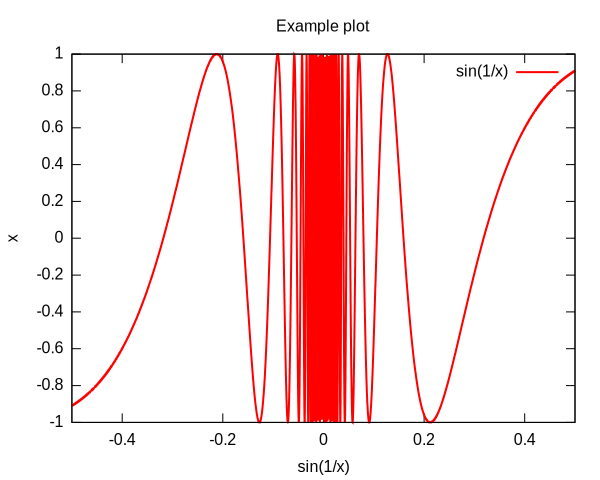

In [11]:
require 'gnuplot'

Gnuplot::Plot.new do |plot|  
    plot.xrange '[-0.5:0.5]'
    plot.title  'Example plot'
    plot.ylabel 'x'
    plot.xlabel 'sin(1/x)'
    plot.samples 10000
    plot.data << Gnuplot::DataSet.new('sin(1/x)') do |ds|
        ds.with = 'lines'
        ds.linewidth = 2
    end
end

You can also create nice 3D plots

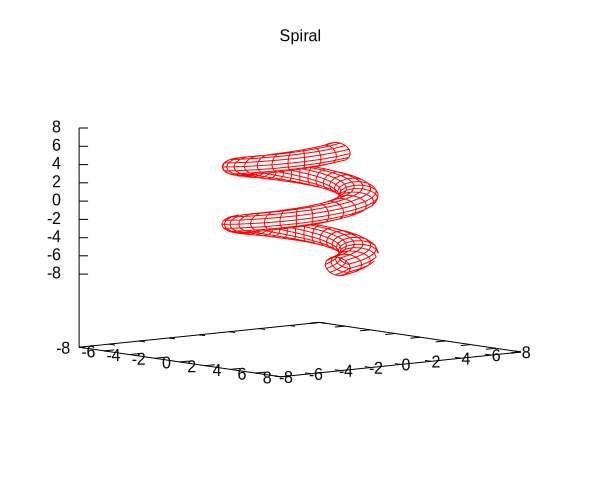

In [12]:
Gnuplot::SPlot.new do |plot|
    plot.title 'Spiral'
    plot.nokey
    plot.parametric
    plot.hidden3d
    plot.view '80,50'
    plot.isosamples '60,15'
    plot.xrange '[-8:8]'
    plot.yrange '[-8:8]'
    plot.zrange '[-8:8]'
    plot.urange '[-2*pi:2*pi]'
    plot.vrange '[-pi:pi]'
    plot.data << Gnuplot::DataSet.new('cos(u)*(cos(v)+3), sin(u)*(cos(v)+3), sin(v)+u') do |ds|
        ds.with = 'lines'
    end
end

### Rubyvis

`Rubyvis` objects are automatically displayed inline as SVG.

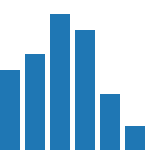

In [13]:
require 'rubyvis'
    
Rubyvis::Panel.new do 
  width 150
  height 150
  bar do
    data [1, 1.2, 1.7, 1.5, 0.7, 0.3]
    width 20
    height {|d| d * 80}
    bottom(0)
    left {index * 25}
  end
end

### Matrix & GSL

`Matrix` and `GSL::Matrix` objects are automatically displayed as $\LaTeX$.

In [14]:
require 'matrix'
Matrix[[1,2,3],[1,2,3]]

Matrix[[1, 2, 3], [1, 2, 3]]

## Nyaplot

In [15]:
require 'nyaplot'

x = []; y = []; theta = 0.6; a=1
while theta < 14*Math::PI do
  x.push(a*Math::cos(theta)/theta)
  y.push(a*Math::sin(theta)/theta)
  theta += 0.1
end
plot1 = Nyaplot::Plot.new
plot1.add(:line, x, y)
plot1.show

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"http://d3js.org/d3.v3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    window.dispatchEvent(event);\n\t

#<Nyaplot::Frame:0x00000001b04360 @properties={:panes=>[#<Nyaplot::Plot:0x00000001dd23d0 @properties={:diagrams=>[#<Nyaplot::Diagram:0x00000001b04ec8 @properties={:type=>:line, :options=>{:x=>"data0", :y=>"data1"}, :data=>"7fbe3169-3c02-4fbb-bbb3-d481b2b734a4"}, @xrange=[-0.33650797881023503, 1.3755593581827972], @yrange=[-0.21722891503668823, 0.9410707889917257]>], :options=>{:zoom=>true, :width=>700, :xrange=>[-0.33650797881023503, 1.3755593581827972], :yrange=>[-0.21722891503668823, 0.9410707889917257]}}>], :data=>{"7fbe3169-3c02-4fbb-bbb3-d481b2b734a4"=>#<Nyaplot::DataFrame:0x00000001dafce0 @name="7fbe3169-3c02-4fbb-bbb3-d481b2b734a4", @rows=[{:data0=>1.3755593581827972, :data1=>0.9410707889917257}, {:data0=>1.0926316961206979, :data1=>0.9203109817681301}, {:data0=>0.8708833866839569, :data1=>0.8966951136244035}, {:data0=>0.6906777425229607, :data1=>0.870363232919426}, {:data0=>0.5403023058681399, :data1=>0.8414709848078965}, {:data0=>0.4123601103868887, :data1=>0.8101885091467594}, {:data0=>0.30196479539722804, :data1=>0.7766992383060219}, {:data0=>0.20576832971122103, :data1=>0.7411986041670715}, {:data0=>0.12140510207160057, :data1=>0.7038926642774715}, {:data0=>0.047158134445135114, :data1=>0.6649966577360362}, {:data0=>-0.018249701438305645, :data1=>0.6247335019009406}, {:data0=>-0.07579087899736768, :data1=>0.5833322414426284}, {:data0=>-0.12622338594060414, :data1=>0.5410264615989971}, {:data0=>-0.17015240361237047, :data1=>0.4980526777302179}, {:data0=>-0.20807341827357134, :data1=>0.45464871341284063}, {:data0=>-0.24040290695231323, :data1=>0.4110520793566063}, {:data0=>-0.2675005078433391, :data1=>0.36749836537254077}, {:data0=>-0.28968522664340196, :data1=>0.3242196574681389}, {:data0=>-0.30724738147551905, :data1=>0.2814429918963125}, {:data0=>-0.3204574462187736, :data1=>0.23938885764158221}, {:data0=>-0.32957259744959516, :data1=>0.19826975839287045}, {:data0=>-0.3348415340803931, :data1=>0.1582888445310477}, {:data0=>-0.33650797881023503, :data1=>0.11963862505567989}, {:data0=>-0.33481316039641046, :data1=>0.08249976869447621}, {:data0=>-0.32999749886681506, :data1=>0.04704000268662195}, {:data0=>-0.3223016613784771, :data1=>0.013413116913964239}, {:data0=>-0.31196711743586014, :data1=>-0.018241919821119185}, {:data0=>-0.29923629391177703, :data1=>-0.04780172549795451}, {:data0=>-0.28435240958219415, :data1=>-0.07515914765495083}, {:data0=>-0.26755905351165576, :data1=>-0.10022377933989181}, {:data0=>-0.24909956009281825, :data1=>-0.12292234535968162}, {:data0=>-0.2292162247865964, :data1=>-0.14319895700229582}, {:data0=>-0.20814939787221448, :data1=>-0.16101523445861063}, {:data0=>-0.18613648825644571, :data1=>-0.17635029722666024}, {:data0=>-0.16341090521590257, :data1=>-0.18920062382698227}, {:data0=>-0.14020096256908965, :data1=>-0.19957978318644173}, {:data0=>-0.1167287669858806, :data1=>-0.2075180410508544}, {:data0=>-0.09320910978604059, :data1=>-0.21306184575568723}, {:data0=>-0.06984837954054984, :data1=>-0.21627319861125363}, {:data0=>-0.04684351098461771, :data1=>-0.21722891503668823}, {:data0=>-0.024380984116316277, :data1=>-0.21601978339857925}, {:data0=>-0.0026358858431683933, :data1=>-0.21274962926895766}, {:data0=>0.018228954883217817, :data1=>-0.20753429350746688}, {:data0=>0.03806374886174981, :data1=>-0.20050053318863942}, {:data0=>0.05673243709264494, :data1=>-0.19178485493262787}, {:data0=>0.0741132828848978, :data1=>-0.18153229065249676}, {:data0=>0.09009935986545672, :data1=>-0.1698951261000298}, {:data0=>0.10459893135455828, :data1=>-0.15703159287243457}, {:data0=>0.11753571776715413, :data1=>-0.14310453473259072}, {:data0=>0.12884904987113782, :data1=>-0.12828005919461727}, {:data0=>0.13849390687682997, :data1=>-0.1127261853343437}, {:data0=>0.14644083944546632, :data1=>-0.09661149870134066}, {:data0=>0.15267577878298577, :data1=>-0.08010382403685547}, {:data0=>0.15719973402441265, :data1=>-0.06336892624241378}, {:data0=>0.16002838110839424, :data1=>-0.04656924969982187}, {:data0=>0.